# Foundations of Data Mining: Assignment 4

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all"

## Backpropagation (3 points)

Figure 1 illustrates a simple neural network model.

![Figure 1](images/assignment/small-net.png)

It has single input $x$, two layers with one neuron each. The activation function of both layers is ReLU. 

The parameters $w_0$ and $w_1$ (no biases) are initialized to the following values $w_0 = 1$ and $w_1 = 2$. Implement a single update step of the gradient descent algorithm by hand. Run the update state for the following two data points:

* $(1, 2)$ 
* $(2, 3)$

The goal is to model the relationship between two continuous variables. The learning rate is set to $0.1$

Provide the solution in the following format:

- A choice for a loss function 
- Compute graph for training the neural network
- Partial derivative expression for each of the parameters in the model
- The update expression for each of the parameters for each of the data-points
- The final value of both parameters after the single step in the gradient descent algorithm



- loss function: MSE
- Compute graph: 


![Figure 1](Q1_graph.png)


We can use two approaches to compute new values for the weights $w_0$ and $w_1$. The first one is to update the weights after each observation, thus taking batchsize = 1. The second is to take the average of the computed weights and thus, only update once, taking batchsize = 2. We will show how to do the first approach. Note that the weights would decrease less if we take batchsize = 2 because of the values for the first observation being equal to zero. Moreover, the change for the weights would then take all observations into account, thus, being more accurate.

Observations: $(x_1,y_1) = (1,2)$ and $(x_2,y_2) = (2,3)$
Weights: $w_0 = 1$ and $w_1 = 2$

We use the MSE as loss function: $L = \frac{1}{2n}\sum_{i=0}^n(\hat{y}_i-y_i)^2$.

The first approach(batchsize = 1): 
\begin{align*}
\hat{y}_1 &= w_1(w_0x_1)\\
	&= 2*1*1 = 2\\
L &= \frac{1}{2}(2-2)^2\\
	& = 0\\
\end{align*}

Note that we now go over the data points one by one. Thus, the loss function does not have to average out over $n$.
As $L=0$ the derivatives will all be zero and, therefore, the weights will not be updated. Thus, we continue to the next observation.

\begin{align*}
\hat{y}_2 &= w_1(w_0x_2)\\
	&= 2*1*2 = 4\\
L &= \frac{1}{2}(4-3)^2 = \frac{1}{2}\\
\frac{\partial L}{\partial \hat{y_2}} &= [\frac{1}{2} (\hat{y_2}-y_2)^2]'\\
	&= 2*\frac{1}{2} (\hat{y_2}-y_2) * 1\\
	&= \hat{y_2}-y_2 \\
	&= 1\\
\frac{\partial L}{\partial w_1} &= \frac{\partial \hat{y_2}}{\partial w_1} \frac{\partial L}{\partial \hat{y_2}}\\
	&=  w_0x_2*\frac{\partial L}{\partial \hat{y_2}}\\
	&=  2*1\\
	&=  2\\
\frac{\partial L}{\partial q} &= \frac{\partial \hat{y_2}}{\partial q} \frac{\partial L}{\partial \hat{y_2}}\\
	&= w_1 * 1\\
	&= 2\\
\frac{\partial L}{\partial w_0} &= \frac{\partial q}{\partial w_0} \frac{\partial L}{\partial q}\\
	&= x_2 *\frac{\partial L}{\partial q}\\
	&= 2*2 = 4
\end{align*}

Thus, $w_1^* = w_1-0.1*2 = 1.8$ and $w_0^* = w_0 - 0.1*4 = 0.6$.


    
    

## Training Deep Models (3 points)

The model in the example code below performs poorly as its depth increases. Train this model on the MNIST digit detection task. 

Examine its training performance by gradually increasing its depth:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Modify the model such that you improve its performance when its depth increases. Train the new model again for the different depths:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Submit an explanation for the limitation of the original model. Explain your modification. 
Submit your code and 6 plots (can be overlaid) for the training performance of both models with different depths. 



problem here could be vanishing gradient. 

In [2]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
nb_epoch = 10

Using TensorFlow backend.


In [3]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [4]:
# Use this parameter to change the depth of the model
number_hidden_layers = 1  # Number of hidden layers

In [45]:
acc_results = []
valacc_results = []

for layer in range(1,4):  
    number_hidden_layers = layer
    # Model
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation('sigmoid'))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1


    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    # Training (You don't need to change this part of the code)
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    acc_results.append(history.history['acc'])
    valacc_results.append(history.history['val_acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 2.0181 - acc: 0.3463 - val_loss: 1.6341 - val_acc: 0.7296
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 1.4710 - acc: 0.

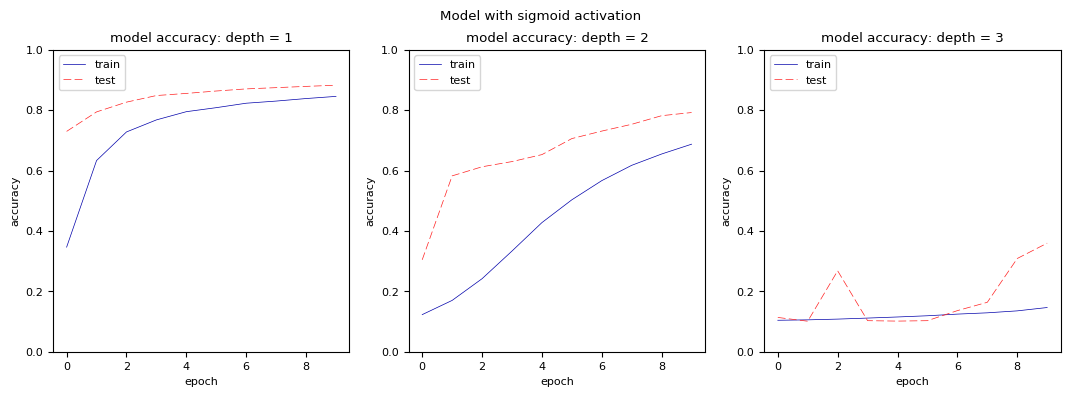

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
fig.suptitle('Model with sigmoid activation')

for ax, k, result in zip(axes, ['depth = 1','depth = 2','depth = 3'], range(0,3)):
    ax.plot(acc_results[result])
    ax.plot(valacc_results[result])    
    ax.set_title('model accuracy: '+k)
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left') 
    ax.set_ylim([0,1])

In [41]:
acc_relu = []
valacc_relu = []

# now try with different activation functions
for layer in range(1,4):  
    number_hidden_layers = layer
    # Model
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='relu'))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1


    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    # Training (You don't need to change this part of the code)
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    #plt.plot(history.history['acc'])
    acc_relu.append(history.history['acc'])
    
    #plt.plot(history.history['val_acc'])
    valacc_relu.append(history.history['val_acc'])
    
    #plt.title('model accuracy')
    #plt.ylabel('accuracy')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s - loss: 1.1182 - acc: 0.7361 - val_loss: 0.5950 - val_acc: 0.8684
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 0.5460 - acc: 0.

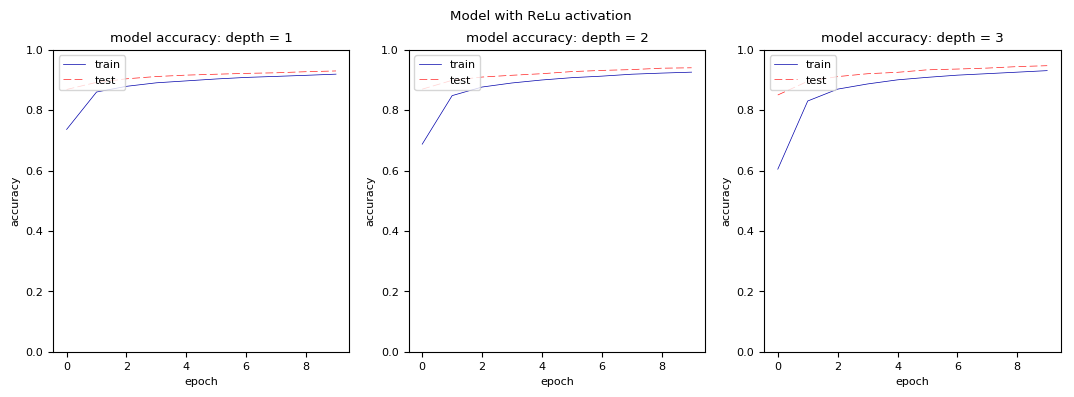

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
fig.suptitle('Model with ReLu activation')

for ax, k, result in zip(axes, ['depth = 1','depth = 2','depth = 3'], range(0,3)):
    ax.plot(acc_relu[result])
    ax.plot(valacc_relu[result])    
    ax.set_title('model accuracy: '+k)
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left') 
    ax.set_ylim([0,1])

## Convolutional Neural Networks for Filtering (2 points)

Convolutional neural networks are well suited for analyzing images. They can be used to apply various image filtering operations. 

The goal of this exercise is to design a CNN model that applies 2 filters to its input images. The input images are 128x128 RGB color images, encoded as 128x128x3 tensor with floating point value normalized between 0 and 1. The RGB format is such that the pixels address by: [:, :, 0] encode the red pixels of the image, the pixels addressed by [:, :, 1] define the green pixels and pixels addressed by [:, :, 2] define the blue pixels. 

Design a convolutional neural network that will: 
1. Apply the sepia filter to the image
2. Apply Gaussian smoothing to the image

Use the specification of the sepia and the Gaussian filter below. 

You answer should contain:
    - The definition of the architecture of the CNN
        - Number of layers
        - Number of filters per layer
        - Shape of the filter per layer
    - Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter
    - The dimensions of the output image when a 5x5 Gaussian smothing is applied


The sepia effect gives warmth and a feel of vintage to photographs. The sepia filter is defined as:

\begin{equation}
R_o = (R_i * .393) + (G_i *.769) + (B_i * .189)\\
G_o = (R_i * .349) + (G_i *.686) + (B_i * .168)\\
B_o = (R_i * .272) + (G_i *.534) + (B_i * .131)
\end{equation}

Gaussian blurring is an effect that reduces the noise and details in an image. 
Gaussian smoothing filter:
$$G(x, y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

- A discretized version of the filter is given by the following table:

<table>
<tr><td>1</td><td>4</td><td>7</td><td>4</td><td>1</td></tr>
<tr><td>4</td><td>16</td><td>26</td><td>16</td><td>4</td></tr>
<tr><td>7</td><td>26</td><td>41</td><td>26</td><td>7</td></tr>
<tr><td>4</td><td>16</td><td>26</td><td>16</td><td>4</td></tr>
<tr><td>1</td><td>4</td><td>7</td><td>4</td><td>1</td></tr>
</table>


- To normalize the filter response, each value should divided by $273$. This is a truncated discretized Gaussian filter with a $\sigma$ of 1.


    - The definition of the architecture of the CNN
        - Number of layers
        
        2 layers
        
        - Number of filters per layer
        
        1 per layer
        
        - Shape of the filter per layer
        
        first layer: 1x1x3
        second layer: 5x5x3
        
    - Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter
    
    first filter: 
    neuron 1 weights of the filter: [.393 .769 0.189] 
    neuron 2 weights of the filter: [.349 .686 0.168]
    neuron 3 weights of the filter: [.272 .534 0.131]
    
    second filter: 5x5x3 
    3 neurons. every neuron has 75 weights. 
    neuron 1 will gaussian RED color: 25 weights: 5x5 with the filter values / 273, the two dimensions (50 weigths) behind it 0
    
    neuron 2 will gaussian Blue color: 5x5 0, then 5x5 with filter values /273, then again 5x5 0
    
    neuron 3 will gaussian Blue color: 5x5 0, 5x5 0, then 5x5 with filter values /273    
    
    - The dimensions of the output image when a 5x5 Gaussian smothing is applied
    Note that all filters will produce a weighted sum over the filterarea. The dimensions of the output image will be a 124 times 124 times 3 'image'. 

## Model Design (2 Points)

Various decisions need to be made in a modeling process to address specific properties of the data and the modeling goal. In this task, you are given a description of a data structure and a goal for which you need to design a model. 

Produce a figure depicting your model. Briefly explain the figure and justify all decisions made in the modeling process. In detail, describe at least: 
- Input data format
- Number of layers
- Type of layers (Dense, Recurrent, Convolutional - 1D, 2D, 3D)
- Regularization
- Model output ----- caption? 
- Loss function  ---- 0/1 loss


The training and execution procedures for the model may differ, so you can use different descriptions for both. 

*Data and goal description:*

The goal of this task is to generate captions for short video clips. 

The video data is structured as sequences of color images. The model needs to be able to process a number of consecutive images that form a short video clip. The training data consists of video clips (few seconds) and a short caption (5-10 words). 

For simplicity, the accuracy of the model is evaluated on the exact prediction of the caption. In other words, the model needs to produce correctly the specific words in a specific order for each video. 


--- Average Pooling => Voorbeel jongen die aan het voetballen is en op de ene foto staat publiek, goal, voetbal, keeper en op andere images staat hij alleen op het voetbalveld. Logischer om dan het gemiddelde te pakken

--- Two tasks: 1) Summarize video(CNN), 2) from "image summary" to caption(RNN)

### Model Design Answer:

To model this, we use that fact that we want to update the sequence word by word. Thus, the 'time' component is in creating the sequence. Hence, for this part we will use a RNN. To be able to create a sequence, we first need to transform the video. We want to create one data structure that summarizes the entire video (sequence of images). For this we have a CNN layer. These two layers will be trained seperately. The CNN will be trained on an ????image/video???? database. This ensures that we extract the correct features from each image to get a correct summary of the video. The RNN will be trained using a dictionary of words. Note that this dictionary needs to contain an indicator that the sequence has ended. Thus, there is a tag in the dictionary of words with END.

- Input data format: The data format will be a tensor of images. Each image is 3D, thus each sequence of images for each video will be 4D tensor. 
- Number of layers: The model consists of two layers. A CNN and a RNN layer.
- Type of layers: 
    - CNN layer. The setup of the CNN is as we have seen in the lecture, type D. However, we end with with a singel vector after the two FC 4096. Hence, we do not have the FC 1000 and softmax at the end. Thus, for each image we run a CNN, each image becomes a FC 4096. Then we run a mean pooling over it to get one vector representing the total video. We choose to use average pooling afterwards, because we want a summary of the video. For example, the video shows a boy playing football. However, the video shows only the ball and the boy on some images but there are also images with crowd, goal and keeper clearly visible. Therefore, we want to take the average such that every part of the video is captured by the FC 4096. Thus, the vector is a summary of the entire video. This single vector is then the input for the next layer. 

    - RNN layer. This layer consists of the a recurrent neural network using the LSTM setup for each cell. The main idea here is to generate a word at each time stamp. This word comes from a dictionary(Dict) for which the model is already pre-trained. The input at each cell is the output from the previous cell and the summary vector of the images. The output is a word that is choses with the highest probability as seen in equation (1). Note that when END is part of the sequence, we want to ensure that the probability that END is chosen next equals one. This was, we can not add new words to the sequence when we have reached the end of a sequence. Moreover, by training correctly, we can ensure that this probability for END being chosen equals zero when the number of previous words is less than 5. 
    
    - These layers can be seen in the figure 2

\begin{align}
\max_i{\Pr[\text{word}_{i\in D}|\text{previous words chosen}]}
\end{align}

- Regularization:  The implementation of the model would make use of a dropout layer in the CNN model. This ensures that the network becomes less sensitive to the specific weights of neurons. 

- Model output: The model outputs a sequence of words. This sequence is smaller than or equal to 10. Output = $S = {S_1,..,S_10}$

- Loss function: The loss function is the 0/1-loss function as we want the exact caption. Thus, if the caption $S$ that is ouputted is only slighly different from the actual sequence $\hat{S}$, the loss will still equal one as it is not completely correct:

$$
L =
  \begin{cases}
    1       & \quad \text{if } \hat{S} \neq S\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

Figure 2:

![Figure 2](Q4_image.png)


## MNIST Calculator (5 points)

During the lectures you have seen a CNN model that can be successfully trained to classify the MNIST images. You have also seen how a RNN model that can be trained to implement addition of two numbers. 

Using the KERAS (or TensorFlow) library, design and train a model that can learn how to add numbers directly from the MNIST image data. More specifically, the model should input a sequence of a set of images and produces a cumulative sum of the numbers represented by the digits in the images.

For example:

Input 1: ![294](images/294.png)

Input 2: ![61](images/61.png)

Output: 355




In [ ]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)